# **Importing dependencies and dataset**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds #Using the tenforflow datasets api to bring in the fashion_mnsit
import matplotlib.pyplot as plt

In [2]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.9208OV_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.9208OV_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
type(ds) #Checking the type of dataset

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [4]:
ds.as_numpy_iterator().next()['label'] #Converting the dataset into numpy iterator

np.int64(2)

#**Visualize the data and building the Datasets**

In [5]:
import numpy as np
data_iterative = ds.as_numpy_iterator()

In [8]:
data_iterative.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

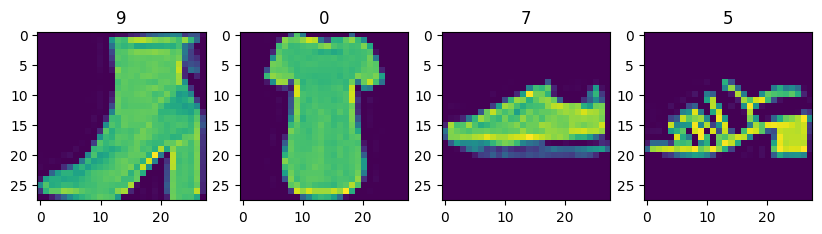

In [12]:
fig,ax = plt.subplots(ncols=4,figsize=(10,10))
for idx in range(4):
  batch = data_iterative.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [13]:
def scale_images(data):
  image = data['image']
  return image/255

In [15]:
ds = tfds.load('fashion_mnist', split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [17]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)